<h4><center><font color="1F4690">PJJ PENGOLAHAN DATA DENGAN PYTHON <br> <br> Selasa, 21 Mei 2023</font></center></h4>
<div class="alert alert-info"><h1 align="center"><font color="1F4690">Feature Engineering</font></h4></div> 

In [1]:
# jika menemukan error "no module named", silahkan uncomment line instalasi di bawah ini

# !pip install fancyimpute
# !pip install pingouin

## Daftar Isi:

* [1. Data Pencilan (Outlier)](#ABC)
* [2. Data Hilang (Missing Value)](#DEF)
* [3. Data Normal](#GEH)
* [3. Penanganan Data yang Hilang](#DEF)
* [4. Penanganan Data Pencilan](#DEF)
* [5. Transforming Variable (Encoding & Binning)](#DEF)
* [6. Deriving Feature from Mathematical Computation](#DEF)
* [7. Deriving Feature from Data and Time](#DEF)

Feature engineering adalah proses menggunakan domain knowledge sehingga meningkatkan kemampuan preediksi dari algoritma machine learning.
* Feature Extraction - membuat feature dari feature-feature yang sudah ada dan menanggalkan feature yang lama untuk mengurangi feature pada dataset.
* Feature Scaling & Selection - proses memilih variabel input untuk model.

![Feature Engineering](https://cdn-coepj.nitrocdn.com/wfkiesSEwVfWQNLPjWDvKANpXMZpUZbv/assets/static/optimized/rev-0aeadd8/wp-content/uploads/2019/07/Screen-Shot-2021-10-18-at-8.48.58-AM-1536x552.png)

# 1. Data Pencilan (Outlier)

## 1.1 Three Sigma Rule

![Sigma](https://miro.medium.com/max/1400/1*IZ2II2HYKeoMrdLU5jW6Dw.png)
$P(a−3σ<X<a+3σ)=0.99730$

Kriteria Outlier untuk **Three Sigma Rule** :
> $|x_K-\bar x|>3\sigma$

Keterangan :
* $x_K$ adalah data ke-$k$, 
* $\bar x$ adalah rata-rata data, 
* $\sigma$ adalah standar deviasi

In [2]:
# PEMBUATAN FUNGSI UNTUK KRITERIA OUTLIER
def three_sigma_outlier (df):
    if (abs(potassium-df['potassium'].mean())>(3*df['potassium'].std())):
        return "Outlier"
    else:
        return "Not Outlier"

In [3]:
import pandas as pd
import numpy as np
df=pd.read_csv('https://raw.githubusercontent.com/mofdac/-materi-das/main/04.%20Data%20Preparation/dataset/UScereal.csv')
df.head(8)

,Unnamed: 0,mfr,calories,protein,fat,sodium,fibre,carbo,sugars,shelf,potassium,vitamins
0,100% Bran,N,212.12121,12.121212,3.030303,393.93939,30.303030,15.15152,18.181818,3,848.48485,enriched
1,All-Bran,K,212.12121,12.121212,3.030303,787.87879,27.272727,21.21212,15.151515,3,969.69697,enriched
2,All-Bran with Extra Fiber,K,100.00000,8.000000,0.000000,280.00000,28.000000,16.00000,0.000000,3,660.00000,enriched
3,Apple Cinnamon Cheerios,G,146.66667,2.666667,2.666667,240.00000,2.000000,14.00000,13.333333,1,93.33333,enriched
4,Apple Jacks,K,110.00000,2.000000,0.000000,125.00000,1.000000,11.00000,14.000000,2,30.00000,enriched
5,Basic 4,G,173.33333,4.000000,2.666667,280.00000,2.666667,24.00000,10.666667,3,133.33333,enriched
6,Bran Chex,R,134.32836,2.985075,1.492537,298.50746,5.970149,22.38806,8.955224,1,186.56716,enriched
7,Bran Flakes,P,134.32836,4.477612,0.000000,313.43284,7.462687,19.40299,7.462687,3,283.58209,enriched


In [4]:
# LOAD FUNGSI UNTUK KRITERIA OUTLIER
def three_sigma_outlier (potassium):
    if (abs(potassium-df['potassium'].mean())>(3*df['potassium'].std())):
        return "Outlier"
    else:
        return "Not Outlier"

    # APLIKASI KE TABEL    
df['result_3sigma']=df['potassium'].apply(three_sigma_outlier)
df.head()

,Unnamed: 0,mfr,calories,protein,fat,sodium,fibre,carbo,sugars,shelf,potassium,vitamins,result_3sigma
0,100% Bran,N,212.12121,12.121212,3.030303,393.93939,30.303030,15.15152,18.181818,3,848.48485,enriched,Outlier
1,All-Bran,K,212.12121,12.121212,3.030303,787.87879,27.272727,21.21212,15.151515,3,969.69697,enriched,Outlier
2,All-Bran with Extra Fiber,K,100.00000,8.000000,0.000000,280.00000,28.000000,16.00000,0.000000,3,660.00000,enriched,Not Outlier
3,Apple Cinnamon Cheerios,G,146.66667,2.666667,2.666667,240.00000,2.000000,14.00000,13.333333,1,93.33333,enriched,Not Outlier
4,Apple Jacks,K,110.00000,2.000000,0.000000,125.00000,1.000000,11.00000,14.000000,2,30.00000,enriched,Not Outlier


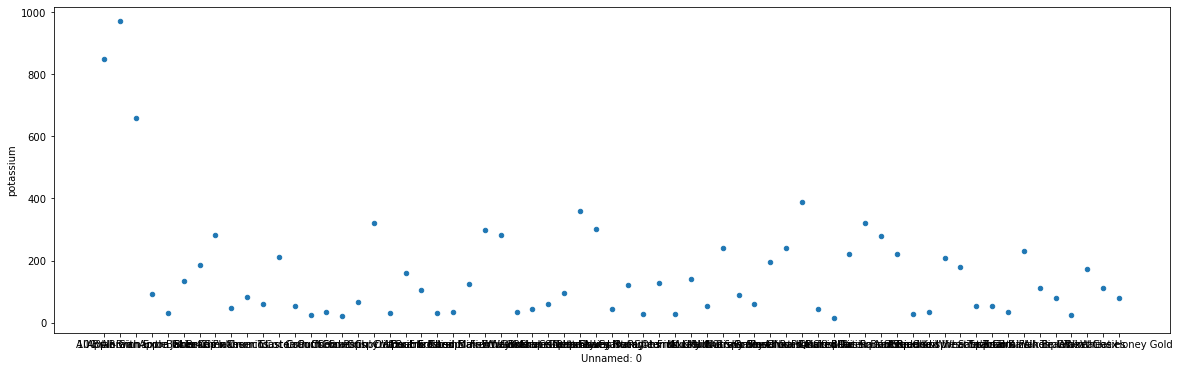

In [5]:
# VISUALISASI OUTLIER
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,6)

df.plot(x ='Unnamed: 0', y='potassium', kind = 'scatter')
plt.show()

In [6]:
# MELIHAT OUTLIER
df.loc[df['result_3sigma']=='Outlier']

,Unnamed: 0,mfr,calories,protein,fat,sodium,fibre,carbo,sugars,shelf,potassium,vitamins,result_3sigma
0,100% Bran,N,212.12121,12.121212,3.030303,393.93939,30.303030,15.15152,18.181818,3,848.48485,enriched,Outlier
1,All-Bran,K,212.12121,12.121212,3.030303,787.87879,27.272727,21.21212,15.151515,3,969.69697,enriched,Outlier


In [7]:
# JIKA HENDAK MEMBUAT DATASET BARU MENGELUARKAN OUTLIER
df_net=df.loc[df['result_3sigma']=='Not Outlier']
df_net.head()

,Unnamed: 0,mfr,calories,protein,fat,sodium,fibre,carbo,sugars,shelf,potassium,vitamins,result_3sigma
2,All-Bran with Extra Fiber,K,100.00000,8.000000,0.000000,280.00000,28.000000,16.00000,0.000000,3,660.00000,enriched,Not Outlier
3,Apple Cinnamon Cheerios,G,146.66667,2.666667,2.666667,240.00000,2.000000,14.00000,13.333333,1,93.33333,enriched,Not Outlier
4,Apple Jacks,K,110.00000,2.000000,0.000000,125.00000,1.000000,11.00000,14.000000,2,30.00000,enriched,Not Outlier
5,Basic 4,G,173.33333,4.000000,2.666667,280.00000,2.666667,24.00000,10.666667,3,133.33333,enriched,Not Outlier
6,Bran Chex,R,134.32836,2.985075,1.492537,298.50746,5.970149,22.38806,8.955224,1,186.56716,enriched,Not Outlier


## 1.2 Hampel Identifier
Kriteria Outlier untuk Hampel Identifier :

> Median Absolute Value from The Median (MADM)

$MADM(x)=1.4826 \times median \{|x_K-x^+|\}$

Keterangan :
* $x_K$ adalah data ke $K$
* $x^+$ adalah median dari data

In [8]:
# BUAT KOLOM UNTUK $x_k-x+$
med=df['potassium'].quantile(0.55)
def abs_med_dev (potassium):
    return abs(potassium-med)

# amd absolut median deviation
df['amd']=df['potassium'].apply(abs_med_dev)
df.head()

,Unnamed: 0,mfr,calories,protein,fat,sodium,fibre,carbo,sugars,shelf,potassium,vitamins,result_3sigma,amd
0,100% Bran,N,212.12121,12.121212,3.030303,393.93939,30.303030,15.15152,18.181818,3,848.48485,enriched,Outlier,736.48485
1,All-Bran,K,212.12121,12.121212,3.030303,787.87879,27.272727,21.21212,15.151515,3,969.69697,enriched,Outlier,857.69697
2,All-Bran with Extra Fiber,K,100.00000,8.000000,0.000000,280.00000,28.000000,16.00000,0.000000,3,660.00000,enriched,Not Outlier,548.00000
3,Apple Cinnamon Cheerios,G,146.66667,2.666667,2.666667,240.00000,2.000000,14.00000,13.333333,1,93.33333,enriched,Not Outlier,18.66667
4,Apple Jacks,K,110.00000,2.000000,0.000000,125.00000,1.000000,11.00000,14.000000,2,30.00000,enriched,Not Outlier,82.00000


In [9]:
med_abs = df['amd'].quantile(0.50)
def hampel_outlier (potassium):
    madm=1.4826*med_abs
    if (potassium>3*madm):
        return "Outlier"
    else:
        return "Not Outlier"
df['result_hampel']=df['potassium'].apply(hampel_outlier)
df.head()

,Unnamed: 0,mfr,calories,protein,fat,sodium,fibre,carbo,sugars,shelf,potassium,vitamins,result_3sigma,amd,result_hampel
0,100% Bran,N,212.12121,12.121212,3.030303,393.93939,30.303030,15.15152,18.181818,3,848.48485,enriched,Outlier,736.48485,Outlier
1,All-Bran,K,212.12121,12.121212,3.030303,787.87879,27.272727,21.21212,15.151515,3,969.69697,enriched,Outlier,857.69697,Outlier
2,All-Bran with Extra Fiber,K,100.00000,8.000000,0.000000,280.00000,28.000000,16.00000,0.000000,3,660.00000,enriched,Not Outlier,548.00000,Outlier
3,Apple Cinnamon Cheerios,G,146.66667,2.666667,2.666667,240.00000,2.000000,14.00000,13.333333,1,93.33333,enriched,Not Outlier,18.66667,Not Outlier
4,Apple Jacks,K,110.00000,2.000000,0.000000,125.00000,1.000000,11.00000,14.000000,2,30.00000,enriched,Not Outlier,82.00000,Not Outlier


In [10]:
# MELIHAT OUTLIER
df.loc[df['result_hampel']=='Outlier']

,Unnamed: 0,mfr,calories,protein,fat,sodium,fibre,carbo,sugars,shelf,potassium,vitamins,result_3sigma,amd,result_hampel
0,100% Bran,N,212.12121,12.121212,3.030303,393.93939,30.303030,15.15152,18.181818,3,848.48485,enriched,Outlier,736.48485,Outlier
1,All-Bran,K,212.12121,12.121212,3.030303,787.87879,27.272727,21.21212,15.151515,3,969.69697,enriched,Outlier,857.69697,Outlier
2,All-Bran with Extra Fiber,K,100.00000,8.000000,0.000000,280.00000,28.000000,16.00000,0.000000,3,660.00000,enriched,Not Outlier,548.00000,Outlier
30,Grape-Nuts,P,440.00000,12.000000,0.000000,680.00000,12.000000,68.00000,12.000000,3,360.00000,enriched,Not Outlier,248.00000,Outlier
44,Post Nat. Raisin Bran,P,179.10448,4.477612,1.492537,298.50746,8.955224,16.41791,20.895522,3,388.05970,enriched,Not Outlier,276.05970,Outlier


## 1.3 Boxplot Outlier Rule

Kriteria Outlier untuk **Boxplot Outlier Rule** :
* $x_K>x_U+1.5Q$
* $x_K>x_L-1.5Q$

Keterangan :
* $x_K$ adalah data ke-$k$, 
* $x_U$ adalah kuartil ke-$1$ atau disebut kuartil bawah (*lower quartile*), 
* $x_L$ adalah kuartil ke-$3$ atau disebut kuartil bawah (*upper quartile*), 
* $Q$ adalah jangkuan interkuartil (selisih kuartil bawah - kuartil atas) 

In [11]:
# FUNGSI OUTLIER RULE
# kuartil bawah
low_q=df['potassium'].quantile(0.25)
# kuartil atas
upr_q=df['potassium'].quantile(0.75)
# jarak antar kuartil
iq_d=df['potassium'].quantile(0.75)-df['potassium'].quantile(0.25)

def boxplot_outlier (potassium):
    if (potassium>upr_q+1.5*iq_d) or (potassium<low_q-1.5*iq_d):
        return "Outlier"
    else:
        return "Not Outlier"

In [12]:
df['result_boxplot']=df['potassium'].apply(boxplot_outlier)
df.head()

,Unnamed: 0,mfr,calories,protein,fat,sodium,fibre,carbo,sugars,shelf,potassium,vitamins,result_3sigma,amd,result_hampel,result_boxplot
0,100% Bran,N,212.12121,12.121212,3.030303,393.93939,30.303030,15.15152,18.181818,3,848.48485,enriched,Outlier,736.48485,Outlier,Outlier
1,All-Bran,K,212.12121,12.121212,3.030303,787.87879,27.272727,21.21212,15.151515,3,969.69697,enriched,Outlier,857.69697,Outlier,Outlier
2,All-Bran with Extra Fiber,K,100.00000,8.000000,0.000000,280.00000,28.000000,16.00000,0.000000,3,660.00000,enriched,Not Outlier,548.00000,Outlier,Outlier
3,Apple Cinnamon Cheerios,G,146.66667,2.666667,2.666667,240.00000,2.000000,14.00000,13.333333,1,93.33333,enriched,Not Outlier,18.66667,Not Outlier,Not Outlier
4,Apple Jacks,K,110.00000,2.000000,0.000000,125.00000,1.000000,11.00000,14.000000,2,30.00000,enriched,Not Outlier,82.00000,Not Outlier,Not Outlier


In [13]:
# MELIHAT OUTLIER
df.loc[df['result_boxplot']=='Outlier']

,Unnamed: 0,mfr,calories,protein,fat,sodium,fibre,carbo,sugars,shelf,potassium,vitamins,result_3sigma,amd,result_hampel,result_boxplot
0,100% Bran,N,212.12121,12.121212,3.030303,393.93939,30.303030,15.15152,18.181818,3,848.48485,enriched,Outlier,736.48485,Outlier,Outlier
1,All-Bran,K,212.12121,12.121212,3.030303,787.87879,27.272727,21.21212,15.151515,3,969.69697,enriched,Outlier,857.69697,Outlier,Outlier
2,All-Bran with Extra Fiber,K,100.00000,8.000000,0.000000,280.00000,28.000000,16.00000,0.000000,3,660.00000,enriched,Not Outlier,548.00000,Outlier,Outlier


> **PERTANYAAN ISENG-ISENG**

> Apakah data yang terdistribusi normal memiliki outlier ?
> Bila ya mengapa, bila tidak mengapa ?

# 2. Normalitas Data

**Apakah semua algoritma machine learning mengharapkan normalitas data ? --> TIDAK**
* Algoritma yang membutuhkan normalisasi : 
    * Algoritma yang bersifat ' curve fitting algorithms' seperti regresi linear/non-linear/logistik, KNN, SVM, Neural Networks, clustering algorithms like k-means clustering etc. 
    * Algoritma yang menggunakan faktorisasi matriks, dekomposisi, dan reduksi dimensi seperti PCA, SVD, Factorization Machines 
* Algoritma yang tidak membutuhkan normalisasi : 
    * tree based algorithms - 
        * CART, 
        * Random Forests, 
        * Gradient Boosted Decision Trees etc

* Hati-hati, perhatikan apanya yang butuh normalisasi ? Apakah regresi linear perlu normalisasi data ? TIDAK! Regresi linear memerlukan normalitas pada sisa residu hasil regresi. 

>> Perlu pemahaman yang tepat terhadap algoritma yang anda gunakan.

## 2.1 QQ Plot

QQ Plot **(quantile-quantile plot)** merupakan instrumen grafis yang membantu untuk menilai apakah suatu dataset memenuhi distribusi teoritikal (distribusi normal atau eksponensial).
Misalkan, bila kita melakukan analisis statistik yang mengasumsikan variabel dependen distribusi normal kita bisa menyandingkan.

>> **Berhenti dan berfikir** </br>
>> Data seperti apakah yang bisa diuji normalitasnya menggunakan qqplot?

Untuk memvisualisasikan QQ Plot kita bisa menggunakan library [pingouin](https://pingouin-stats.org/).  Jangan lupa install dulu librarynya :</br>
`
pip install pingouin
`

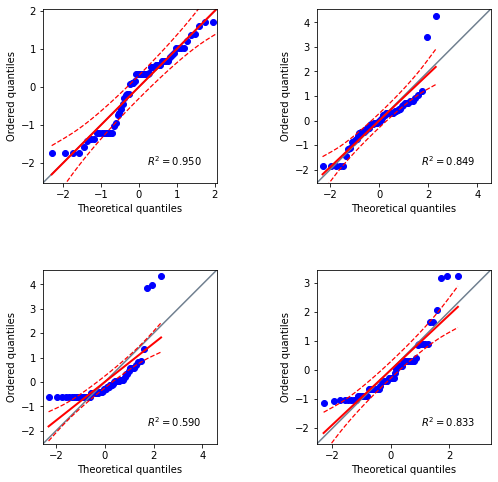

In [14]:
import pingouin as pg
import pandas as pd
import matplotlib.pyplot as plt

fig, ((qplot_sugars, qplot_sodium), (qplot_fibre, qplot_protein)) = plt.subplots(2, 2, figsize=(9, 8))
fig.subplots_adjust(hspace=0.5)
qp_sugars = pg.qqplot(df['sugars'], ax=qplot_sugars, dist='norm')
qp_sodium = pg.qqplot(df['sodium'],ax=qplot_sodium, dist='norm')
qp_fibre = pg.qqplot(df['fibre'], ax=qplot_fibre, dist='norm')
qp_protein = pg.qqplot(df['protein'], ax=qplot_protein,dist='norm')

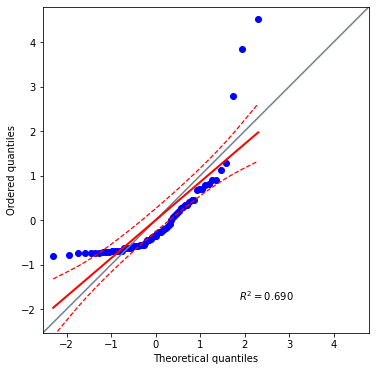

In [15]:
import pingouin as pg
import pandas as pd
import matplotlib.pyplot as plt

qp_sugars = pg.qqplot(df['potassium'], dist='norm')

### Penanganan

Untuk mengatasi ketaknormalan data bisa menggunakan transformasi variabel, menggunakan 
* log transformation,
* square root transformation,
* reciprocal transformation,
* dll

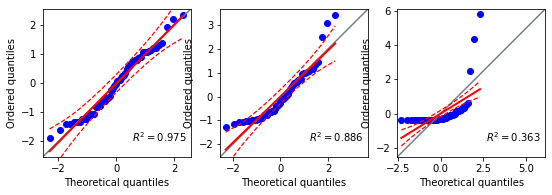

In [31]:
log_norm = df['potassium'].apply(np.log1p)
sqrt_norm = df['potassium'].apply(np.sqrt)
pow_norm = df['potassium'] ** 2
fig, (a,b,c) = plt.subplots(1, 3, figsize=(9, 8))
fig.subplots_adjust(hspace=0.5)
a_plot = pg.qqplot(log_norm, ax = a, dist='norm')
b_plot = pg.qqplot(sqrt_norm,ax = b, dist='norm')
c_plot = pg.qqplot(pow_norm, ax = c, dist='norm')

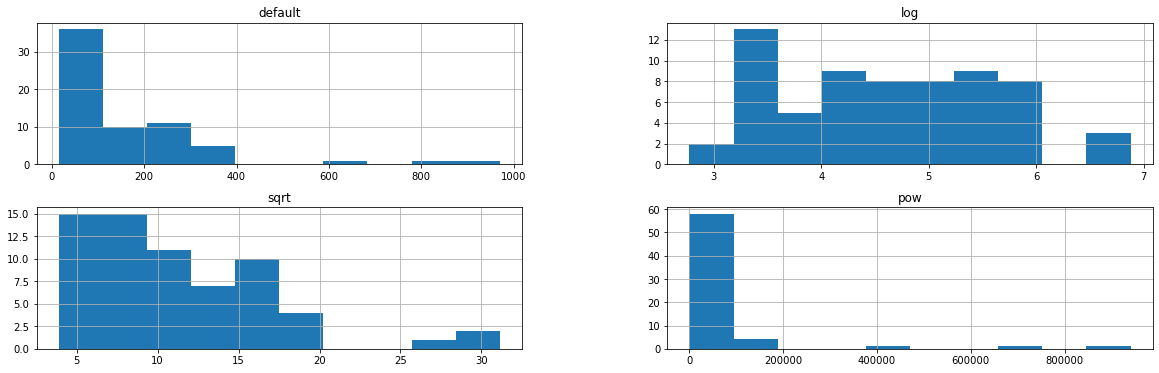

In [43]:
merged_df = pd.DataFrame([df.potassium,log_norm,sqrt_norm,pow_norm]).transpose()
merged_df.columns = ['default','log','sqrt','pow']
merged_df.hist()
plt.show()

> **Berhenti dan berfikir** </br>
> Mengapa transformasi data umumnya menggunakan log/square root transformation ?

In [ ]:
# nilai data 3, -7, 12
# ditransformasi dengan f(x)=(2x+1)
# nilai data setelah transformasi 8, -13, 25

# 3. Data Hilang (Missing Value)

Misalkan anda melakukan analisis data terhadap data peminjaman BMN di suatu kantor. Dari daftar peminjaman BMN tersebut anda melihat ada suatu list peminjaman sbb :

| No  | BMN                   | Nama Peminjam | Jumlah Dipinjam |
| --- | --------------------- | ------------- | --------------- |
| 1   | Mobil Avanza          | Budi          | 4               |
| 2   | Laptop Dell           | Ali           | 3               |
| 3   | Proyektor Panasonic   | Iqbal         | 8               |
| 4   | Laptop Asus           | Susi          |                 |
| 5   | Mesin Fotokopi Konica | Ani           | 6               |
| …   | …                     | …             | …               |
| 21  | Laptop Acer           | Rudi          |                 |
| 22  | Mesin Fotokopi        | Ali           | 6               |
| 23  | Proyektor Panasonic   | Mina          | 4               |
| …   | …                     | …             | …               |
| 87  | Mobil Alphard         | Susi          | 3               |
| 88  | Laptop Lenovo         | Mikail        | 9               |
| 100 | Mobil Nissan          | Joni          |                 |

Dari data di atas terlihat ada peminjaman yang hari peminjamannya tidak tercatat. Anda mencari tahu mengapa data tersebut hilang. Operator BMN mengatakan bahwa memang sekitar 5% pencatatan lupa dicatat jumlah barang yang dipinjam.
Anda menanyakan apakah 5% tersebut spesifik pada jenis barang tertentu yang dipinjam atau user tertentu. Petugas mengatakan tidak, itu terjadi merata di seluruh pencatatan.

* **Missing Completely at Random (MCAR)** </br> 
Dengan mengasumsikan pernyataan petugas benar, maka kasus di atas dapat dianggap sebagai MCAR, yakni data yang hilang tidak memiliki relasi dengan variabel yang sedang diobservasi.
* **Missing at Random (MAR)** </br>
Data tidak hilang secara acak tetapi bisa diprediksi dari variabel-variabel lain yang sedang diobservasi maka kasus tersebut disebut sebagai MAR. Misalkan, data yang hilang bisa diprediksi dari jenis BMN yang diprediksi atau dari orang yang meminjam.
* **Missing Not At Random (MNAR)** </br>
Bila memiliki pola yang dapat dijelaskan namun diluar variabel yang diobservasi disebut MNAR . Misalkan, data yang hilang dapat diprediksi dari apakah pada tanggal peminjaman hari cerah atau hujan, tetapi kita tidak mengobservasi hal tersebut.

Lebih jauh tentang ini :
* [Youtube - Missing Data Analysis, Mplus Short Course](https://www.youtube.com/watch?v=gdKTJdrqtOI)

Cara untuk melihat data kosong :
* Menggunakan library missingno (jangan lupa install terlebih dahulu)
* menggunakan df.isnull()

In [ ]:
df_titanic = pd.read_csv('https://raw.githubusercontent.com/mofdac/-materi-das/main/04.%20Data%20Preparation/dataset/titanic.csv')
df_titanic.isnull().sum()

In [ ]:
# visualiasi missing value dengan bantuan library
import pandas as pd
import missingno as msno
df_titanic.head()
msno.matrix(df_titanic, figsize=(10, 6))

# 3. Penanganan atas Data yang Hilang

Ada banyak cara untuk menangani data yang hilang. Sebelum melakukan penanganan perhatikan baik-baik mengapa data hilang?
1. Melakukan penghapusan pada observasi yang datanya hilang
2. Melakukan imputasi (Imputation berarti menggunakan variabel-variabel data yang ada untuk memprediksi data yang hilang.)

![Treatment](https://editor.analyticsvidhya.com/uploads/123801_qE8g5nqa2GNT_2tRFag8aw.jpeg)

## 3.1 Menghapus Observasi yang Datanya Hilang

Ini bisa dilakukan dengan list-wise deletion ataupun pair-wise deletion.

In [ ]:
# Kondisi sebelum penghapusan
df_titanic.describe()

## 3.1.1 Listwise Deletion

Pada listwise deletion suatu row akan dihapus bila salah satu variabel memiliki nilai yang hilang. 

In [ ]:
df_titanic.dropna(subset=['Age'],how='any',inplace=True)
df_titanic.describe()

## 3.1.2 Pairwise Deletion

Parwise Deletion digunakan saat prosedur statistik yang anda butuhkan tidak memperbolehkan adanya nilai yang hilang. Misalkan anda memiliki 6 variabel, VAR1, VAR2, ..., VAR6. Secara MCAR, pada VAR3 dan VAR5 terdapat data yang hilang. Untuk itu, pada prosedur statistik sum untuk variabel 3 dan variabel 5, data yang hilang tidak diikutkan. </br>
`This is a problematic way to solve a problem.`</br>
Namun, metode ini logis ketika misalkan anda memerlukan regresi yang tidak membutuhkan VAR 3 dan VAR 5.

## 3.2 Single Imputation
Single imputation merupakan prosedur dimana suatu nilai dari elemen data yang hilang digantikan tanpa mendefinisikan model eksplisit untuk memperkirakan data yang hilang tersebut.

## 3.2.1 Mean/Median/Mode Imputation

mengganti data yang hilang dengan menggunakan rata-rata dari data variabel (exclude data yang hilang).

In [ ]:
# fungsi fillna di pandas dapat digunakan untuk imputasi missing values
# taruh hasilnya di variable baru untuk mempermudah pengamatan
df_titanic['Age_mean_uni'] = df_titanic.Age.fillna(df_titanic.Age.mean())
df_titanic['Age_median_uni'] = df_titanic.Age.fillna(df_titanic.Age.median())
df_titanic['Age_mode_uni'] = df_titanic.Age.fillna(df_titanic.Age.mode())

In [ ]:
# mengetahui mean per kelompok sex, kita menggunakan groupby
df_grouped = df_titanic[['Sex', 'Age']].groupby(['Sex']).mean()
df_grouped
# imputasi untuk male group
# filter kondisi 
condition = df_titanic['Sex'] == 'male'
# tangkap nilai mean untuk laki2
mean_male = df_grouped.loc['male','Age']
# imputasi
df_titanic.loc[condition, 'Age_mean_multi'] = df_titanic.loc[condition,'Age'].fillna(mean_male)

## 3.3 Multiple Imputation

Multiple imputation merupakan cara untuk memperkirakan data yang hilang dengan memperhatikan faktor ketidakpastian.

Adanya beberapa metode untuk melakukan multiple imputation antara lain :
* KNN or K-Nearest Neighbor imputation
* Multiple Imputation by Chained Equations (MICE) with random forests

## 3.3.1 Multivariate Imputation via Chained Equations (MICE)

Misalkan kita memiliki variabel $x_1, x_2, x_3, ...x_n$. Pada dataset anda, variabel $x_2$ dan $x_3$, dan $x_5$ mengalami beberapa data yang hilang.
* Pada saat anda ingin memunculkan nilai yang hilang dari $x_2$ maka variabel yang hilang akan diregres terhadap variabel $x_1$, $x_3$,  $x_4 - x_5$ 
* Pada saat anda ingin memunculkan nilai yang hilang dari $x_3$ maka variabel yang hilang akan diregres terhadap variabel $x_1$, $x_2$,  $x_4 - x_5$ 
* dst

Secara default, regresi linear digunakan untuk memprediksi nilai yang hilang bila variabel yang diprediksi adalah variabel kontinu dan regresi logistik bila variabel yang hilang adalah variabel kategorikal.

In [ ]:
import pandas as pd
import numpy as np
# importing the MICE from fancyimpute library
from fancyimpute import IterativeImputer
  
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4],
                   [5,      7,  8,     2],
                   [2,      5,  7,     9]],
                  columns = ['var1', 'var2', 'var3', 'var4'])
df

In [ ]:
# calling the  MICE class
mice_imputer = IterativeImputer()

# imputing the missing value with mice imputer
df = mice_imputer.fit_transform(df)
df_mice = pd.DataFrame(df, columns=['var1', 'var2', 'var3', 'var4'])
df_mice

Referensi Lain :
* https://campus.datacamp.com/courses/dealing-with-missing-data-in-python/advanced-imputation-techniques?ex=1
* https://towardsdatascience.com/handling-missing-data-like-a-pro-part-3-model-based-multiple-imputation-methods-bdfe85f93087
* Flexible Imputation of Missing Data Second Edition, Steven van Buuren, CRC Press

# 4. Penanganan Outlier

Ada tiga metode dasar untuk menangani data pencilan :
1. **Menghapus Pencilan** 
2. **Mengganti Nilai Pencilan** 
3. **Mengestimasi Nilai Pencilan**

Untuk 1 dan 3 bisa dilakukan dengan metode penanganan yang sama dengan penanganan data yang hilang. Untuk metode ke-2 ada beberapa cara yang dapat dilakukan, salah satunya adalah Winsorization.

## 4.1 Winsorization

merupakan salah satu metode transformasi statistik dengan membatasi nilai-nilai ekstrim data.
Disebut Winsorization karena metode ini ditemukan oleh biostatistisi Charles P. Winsor (1895–1951).
Strategi umum dari Winsorization adalah dengan menspesifikasi persentil data.
Winsorization 90% berarti 
* mengganti semua data di bawah 5% persentil menjadi 5%
* mengganti semua data di atas 95% persentil menjadi 95%

In [ ]:
# Misalkan kita memiliki list data :
dataA=[3, 14, 16, 16, 17, 29, 34, 36, 39, 47, 59, 64, 65, 66, 68, 79, 91, 98]
import numpy as np
q05=np.quantile(dataA, .05)
q95=np.quantile(dataA, .95)
print(q05)
print(q95)

Maka :
* semua data di bawah 12 akan diganti dengan 12 
* semua data di atas 92 akan diganti dengan 92

## 4.2 Estimasi/Penggantian Outlier Multivariate

Deteksi outlier bedasarkan pengamatan terhadap lebih dari 1 features biasa dikenal dengan multivariate outlier detections.
* k-nearest neighbours
* DBSCAN (Density-Based Spatial Clustering of Applications with Noise-DBSCAN) 
* isolation forests

# 5. Transformasi Variabel

## 5.1 Encoding

Encoding merupakan metode untuk mengubah data kategorikal ke dalam format bilangan bulat. Ada beberapa macam encoding, antara lain label encoding, binary encoding, hash encoding, target encoding, dll. Untuk melakukan encoding kita bisa menggunakan :
* library LabelEncoder.
* dictionary {}.
* df.Series.map().
* dst.

### 5.1.1 Label Encoding

Digunakan untuk mengubah sekumpulan label ke dalam format integer sehingga bisa dilakukan komputasi.

In [ ]:
import pandas as pd

city_name = ['Jakarta', 'Bandung', 'Surabaya', 'Jakarta', 'Bandung', 'Surabaya', 'Pontianak', 'Medan', 'Makassar', 'Jayapura']
df = pd.DataFrame(city_name, columns=['Kota'])
df

In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Kota']= label_encoder.fit_transform(df['Kota'])  
df

# 5.2.2 One Hot Encoding

* Pada one hot encoding, kita mengkonversi satu feature menjadi beberapa fitur yang nilainya 0 atau 1.
* Salah satu penggunaaan hot encoding adalah pada saat menggunakan regresi dengan variabel dummy.

In [ ]:
import pandas as pd

nama_pegawai = ['Ninuk', 'Marwoto', 'Saefudin', 'Hanafi', 'Sawiyah', 'Cecek', 'Lintang']
kota_asal = ['Jakarta', 'Bandung', 'Surabaya', 'Jakarta', 'Medan', 'Makassar', 'Medan']
df = pd.DataFrame(list(zip(nama_pegawai, kota_asal)), columns=['nama_pegawai', 'kota_asal'])
df

In [ ]:
df_ohe = pd.get_dummies(df['kota_asal'])
df_ohe
# Join the encoded df
df_ohe2 = df.join(df_ohe)
df_ohe2

In [ ]:
from sklearn.preprocessing import OneHotEncoder

y = OneHotEncoder(sparse=False)
y = y.fit_transform(df[['kota_asal']])
df_y = pd.DataFrame(y)
df_y

## 5.2. Binning

Metode transformasi variabel lainnya adalah binning yakni mengkonversi data numeris menjadi kategoris, dengan menggunakan range.

### 5.2.1 Menggunakan qcut


* Melalui qcut kita bisa membuat kategorisasi berdasarkan persen data (percentiles, quartiles, dan median). 
* Kita membagi-bagi keranjangan kategori dengan atribut `q`, bila `q=4` maka sebenarnya kita sedang membagi data menjadi 4-kuartil. 
* Bila spesifikasi `q=5` maka kita membagi data menjadi kuintil.

>> Do remember ! 
>> Saat menggunakan qcut, ingatlah bahwa pandas, saat membuat layer kategori sudah mengurutkan data terlebih dahulu.

In [ ]:
# right = True, by default
import pandas as pd
df_titanic = pd.read_csv('https://raw.githubusercontent.com/mofdac/-materi-das/main/04.%20Data%20Preparation/dataset/titanic.csv')
df_titanic.head()

In [ ]:
pd.qcut(df_titanic['Age'], q=4).unique()

In [ ]:
df_titanic['Klas_Umur']=pd.qcut(df_titanic['Age'], q=4)
df_titanic.head()

In [ ]:
# Memberi Label pada setiap kategori
df_titanic['Klas_Umur']=pd.qcut(df_titanic['Age'], 
                                q=[0, 0.2, 0.4, 0.6, 0.8, 1.0], 
                                labels=['muda banget',
                                        'muda_aja',
                                        'agak_muda',
                                        'mulai_gak_muda',
                                        'enggak_muda']).head()
df_titanic.head()

### 5.2.2 Menggunakan cut

Cut mirip dengan `qcut` perbedaan mendasarnya adalah cut tidak menjamin adanya kesamaan distribusi data dalam range kategori yang dibuatnya.

In [ ]:
df_titanic['Age']=pd.cut(df_titanic['Age'], bins=3, 
                         labels=['muda', 'paruh baya', 'lansia']).head()
df_titanic.head()

# 6. Menciptakan Feature dari Data Waktu

* Terdapat masa dimana pada suatu masalah prediktif, variabel waktu memiliki kontribusi tertentu.
* Misalkan, pada data time series kita menemukan adanya siklus pada hari/bulan/jam tertentu. Untuk itu, kita perlu memunculkan potongan informasi waktu tersebut.

## 6.1 Mengekstrak Potongan Tanggal atau Waktu dari Timestamp

In [ ]:
import pandas as pd
data_waktu=pd.read_csv('https://raw.githubusercontent.com/mofdac/-materi-das/main/04.%20Data%20Preparation/dataset/TPIA.csv')
data_wkt=data_waktu[['date', 'previous', 'open_price', 'close']].copy()
data_wkt['date'] = pd.to_datetime(data_wkt['date'])
data_wkt.head()

# 6.2 Mengekstrak tanggal saja

In [ ]:
data_wkt['tanggal'] = data_wkt['date'].dt.date
data_wkt.head()

## 6.3 Mengekstrak jam saja

In [ ]:
data_wkt['jam'] = data_wkt['date'].dt.time
data_wkt.head()

## 6.4 Mengekstrak tahun

In [ ]:
data_wkt['tahun'] = data_wkt['date'].dt.year
data_wkt.head()

## 6.5 Mengekstrak kuartal

In [ ]:
data_wkt['kuartal'] = data_wkt['date'].dt.quarter
data_wkt.head()

## 6.7 Mengekstrak bulan

In [ ]:
data_wkt['bulan'] = data_wkt['date'].dt.month
data_wkt.head()

## 6.8 Mengekstrak Hari (Langsung di enkoding)

In [ ]:
data_wkt['hari'] = data_wkt['date'].dt.dayofweek
data_wkt.head()

## 6.9 Mengoperasikan tanggal

In [ ]:
from datetime import timedelta
data_wkt['tgl_migdep'] = data_wkt['date'] + timedelta(days=7)
data_wkt.head()

## 6.10 Menghitung selisih waktu

In [ ]:
data_wkt['delta_hari'] = (data_wkt['tgl_migdep'] - data_wkt['date']).dt.days
data_wkt.head()

# 7. Menciptakan Feature dari Komputasi Matematis

In [ ]:
data_cmp=data_waktu[['date', 'previous', 'open_price', 'close']].copy()
data_cmp.head()

## 7.1 Operasi antar kolom

In [ ]:
data_cmp['Selisih']=data_cmp['close']-data_cmp['open_price']
data_cmp.head()

## 7.2 Operasi dengan skalar

In [ ]:
data_cmp['add_close']=data_cmp['close']+20000
data_cmp.head()

## 7.3 Memberikan kategori

In [ ]:
def ur (selisih):
    if selisih>0 :
        return 'Untung'
    elif selisih==0:
        return 'Sama'
    else:
        return 'Rugi'
data_cmp['kategori']=data_cmp['Selisih'].apply(ur)
data_cmp.head()